In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("WHR2024.csv")
df.head()

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [3]:
df.isnull().sum()

Country name                                  0
Ladder score                                  0
upperwhisker                                  0
lowerwhisker                                  0
Explained by: Log GDP per capita              3
Explained by: Social support                  3
Explained by: Healthy life expectancy         3
Explained by: Freedom to make life choices    3
Explained by: Generosity                      3
Explained by: Perceptions of corruption       3
Dystopia + residual                           3
dtype: int64

In [4]:
median_log_gdp = df['Explained by: Log GDP per capita'].median()
df['Explained by: Log GDP per capita'].fillna(median_log_gdp, inplace=True)

In [5]:
median_social_support = df['Explained by: Social support'].median()
df['Explained by: Social support'].fillna(median_social_support, inplace=True)

In [6]:
median_healthy_life_expectancy = df['Explained by: Healthy life expectancy'].median()
df['Explained by: Healthy life expectancy'].fillna(median_healthy_life_expectancy, inplace=True)

In [7]:
median_freedom = df['Explained by: Freedom to make life choices'].median()
df['Explained by: Freedom to make life choices'].fillna(median_freedom, inplace=True)

In [8]:
median_generosity = df['Explained by: Generosity'].median()
df['Explained by: Generosity'].fillna(median_generosity, inplace=True)

In [9]:
median_corruption = df['Explained by: Perceptions of corruption'].median()
df['Explained by: Perceptions of corruption'].fillna(median_corruption, inplace=True)

In [10]:
median_dystopia_residual = df['Dystopia + residual'].median()
df['Dystopia + residual'].fillna(median_dystopia_residual, inplace=True)

In [11]:
df.isnull().sum()

Country name                                  0
Ladder score                                  0
upperwhisker                                  0
lowerwhisker                                  0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [12]:
numerical_values_df = df.drop(columns=['Country name'])
numerical_values_df.head()

,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


<Axes: >

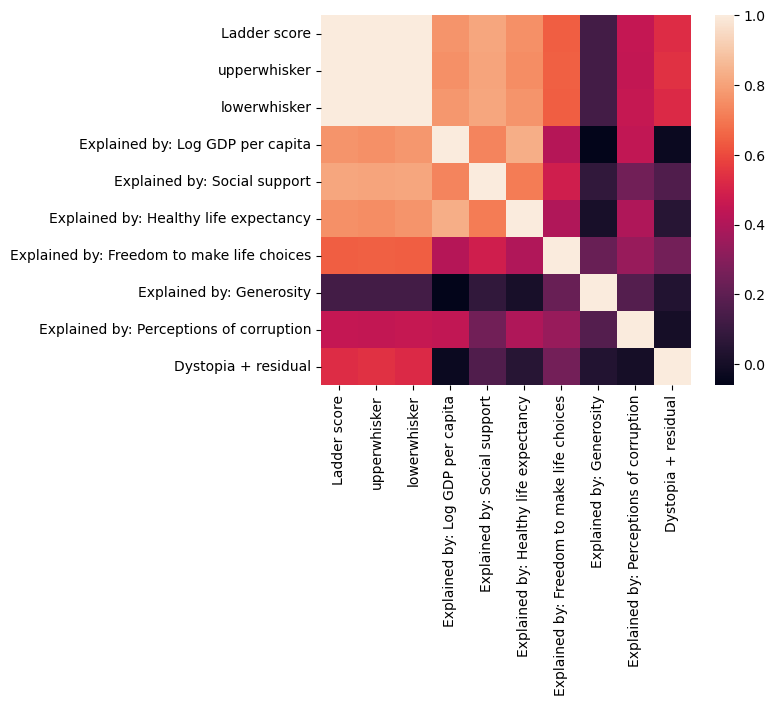

In [13]:
corrmat = numerical_values_df.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, square=True)

<Axes: xlabel='Explained by: Freedom to make life choices', ylabel='Country name'>

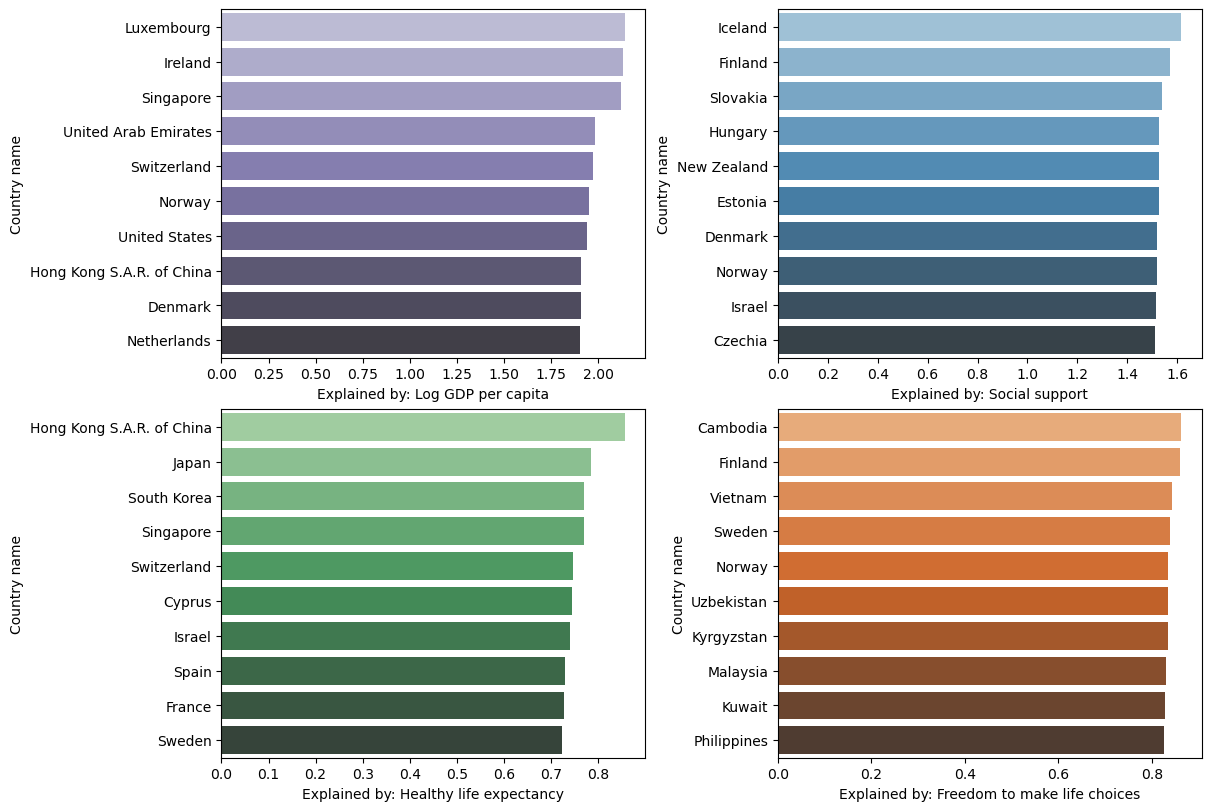

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))
sns.barplot(x='Explained by: Log GDP per capita',y='Country name',data=df.nlargest(10,'Explained by: Log GDP per capita'),ax=axes[0,0],palette="Purples_d")
sns.barplot(x='Explained by: Social support',y='Country name',data=df.nlargest(10,'Explained by: Social support'),ax=axes[0,1],palette="Blues_d")
sns.barplot(x='Explained by: Healthy life expectancy',y='Country name',data=df.nlargest(10,'Explained by: Healthy life expectancy'),ax=axes[1,0],palette="Greens_d")
sns.barplot(x='Explained by: Freedom to make life choices',y='Country name',data=df.nlargest(10,'Explained by: Freedom to make life choices'),ax=axes[1,1],palette="Oranges_d")

In [15]:
scaler = MinMaxScaler()
numerical_values_df = scaler.fit_transform(numerical_values_df)

C:\Users\Tulsi Yogesh Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tulsi Yogesh Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Tulsi Yogesh Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tulsi Yogesh Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

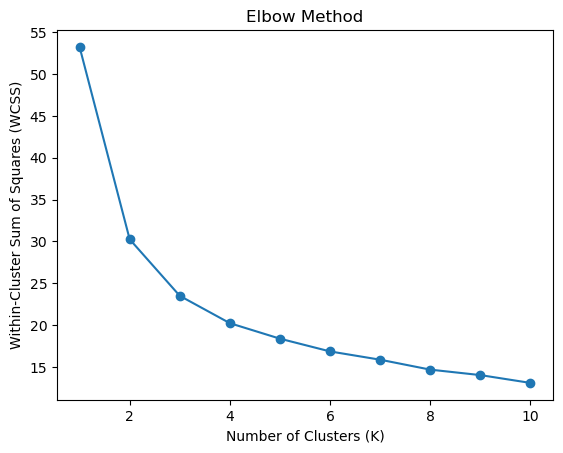

In [16]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(numerical_values_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker = 'o', linestyle = '-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

In [19]:
silhouette_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(numerical_values_df)
    cluster_labels = kmeans.predict(numerical_values_df)
    silhouette_scores.append(silhouette_score(numerical_values_df, cluster_labels))

print('Silhoutte Scores for Different Values of K:')
for k, score in zip(range(2,11), silhouette_scores):
    print(f"Number of Clusters: {k}, Silhouette Score: {score}")

C:\Users\Tulsi Yogesh Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tulsi Yogesh Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Tulsi Yogesh Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tulsi Yogesh Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

Silhoutte Scores for Different Values of K:
Number of Clusters: 2, Silhouette Score: 0.3786551514246336
Number of Clusters: 3, Silhouette Score: 0.32239467487049306
Number of Clusters: 4, Silhouette Score: 0.29119197427274457
Number of Clusters: 5, Silhouette Score: 0.2140189514520719
Number of Clusters: 6, Silhouette Score: 0.24505892984536284
Number of Clusters: 7, Silhouette Score: 0.2055142671148443
Number of Clusters: 8, Silhouette Score: 0.2051741309764427
Number of Clusters: 9, Silhouette Score: 0.1949022149350835
Number of Clusters: 10, Silhouette Score: 0.2141025265150225


In [20]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(numerical_values_df)
kmeans.predict(numerical_values_df)
cluster_labels = kmeans.labels_

for i, label in enumerate(cluster_labels):
    print(f"Data point {i+1} is assigned to Cluster {label + 1}")

C:\Users\Tulsi Yogesh Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tulsi Yogesh Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Data point 1 is assigned to Cluster 2
Data point 2 is assigned to Cluster 2
Data point 3 is assigned to Cluster 2
Data point 4 is assigned to Cluster 2
Data point 5 is assigned to Cluster 2
Data point 6 is assigned to Cluster 2
Data point 7 is assigned to Cluster 2
Data point 8 is assigned to Cluster 2
Data point 9 is assigned to Cluster 2
Data point 10 is assigned to Cluster 2
Data point 11 is assigned to Cluster 2
Data point 12 is assigned to Cluster 2
Data point 13 is assigned to Cluster 2
Data point 14 is assigned to Cluster 2
Data point 15 is assigned to Cluster 2
Data point 16 is assigned to Cluster 2
Data point 17 is assigned to Cluster 2
Data point 18 is assigned to Cluster 2
Data point 19 is assigned to Cluster 2
Data point 20 is assigned to Cluster 2
Data point 21 is assigned to Cluster 2
Data point 22 is assigned to Cluster 2
Data point 23 is assigned to Cluster 2
Data point 24 is assigned to Cluster 2
Data point 25 is assigned to Cluster 2
Data point 26 is assigned to Clust

In [21]:
df['Cluster_Labels'] = cluster_labels

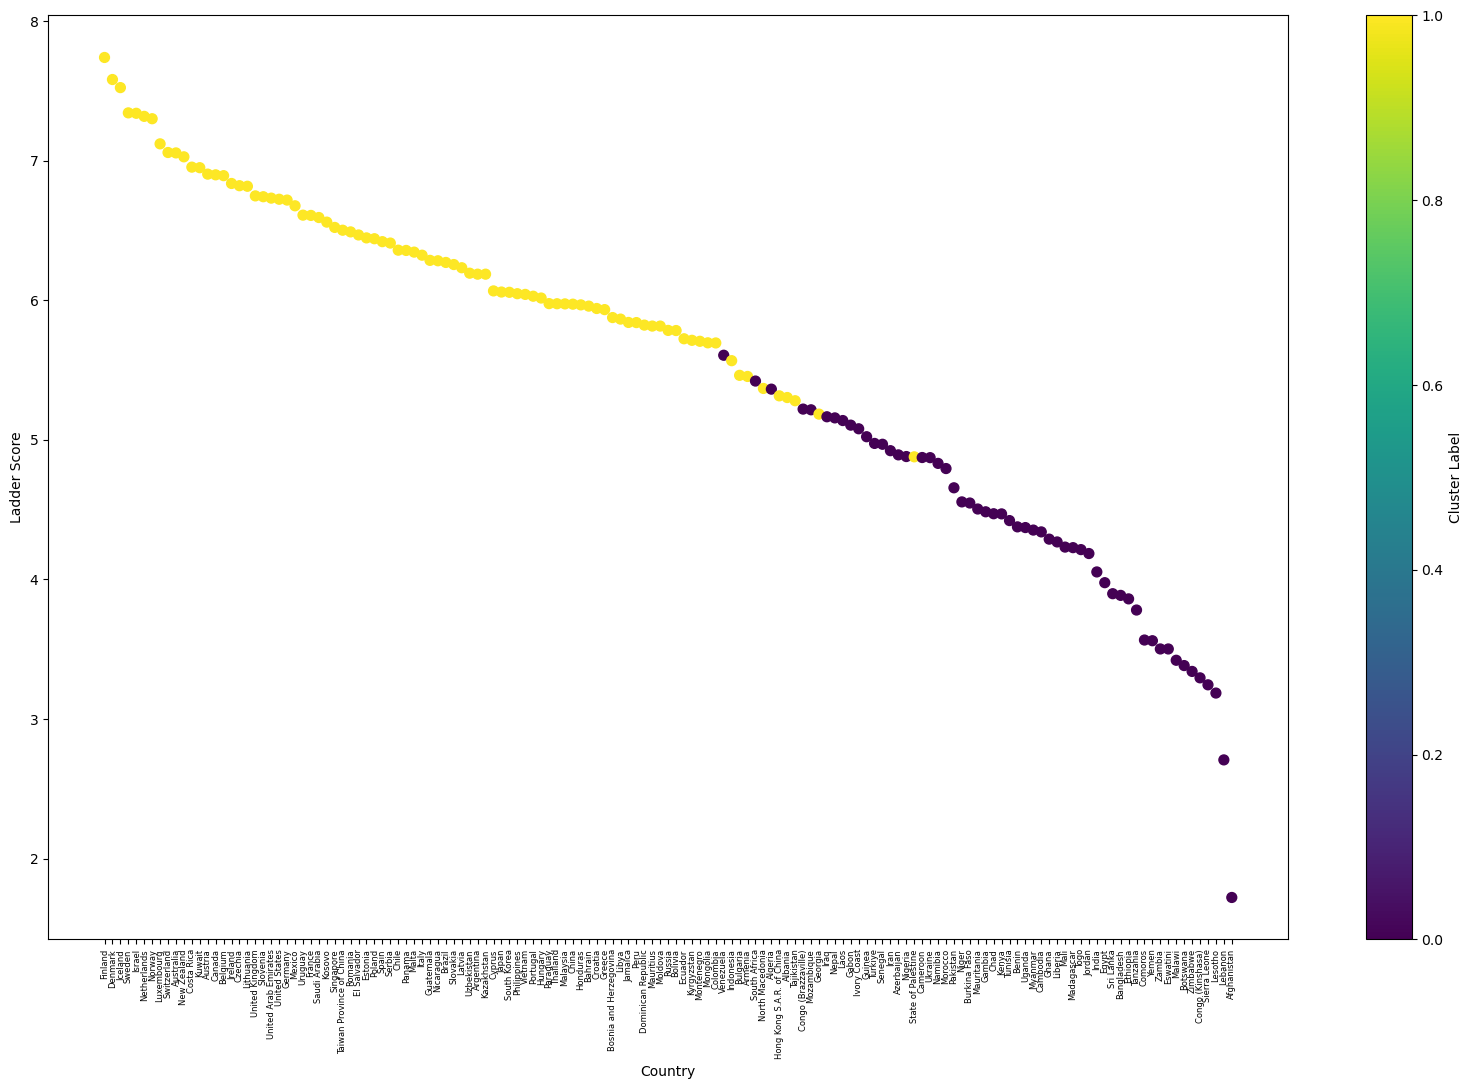

In [22]:
fig, ax = plt.subplots(figsize=(20, 12))  

scatter = ax.scatter(x=df['Country name'], y=df['Ladder score'], c=df['Cluster_Labels'], s=50)
ax.set_xlabel('Country')
ax.set_ylabel('Ladder Score')
plt.xticks(rotation=90, fontsize=6)
plt.colorbar(scatter, ax=ax, label='Cluster Label')

plt.show()

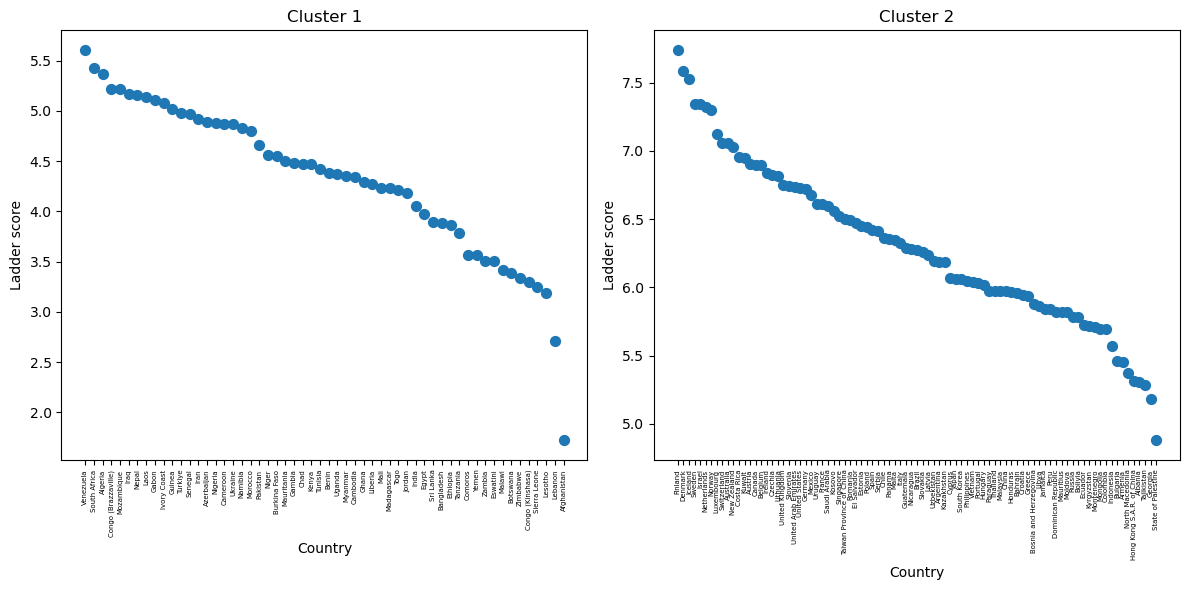

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

cluster1_df = df[df['Cluster_Labels'] == 0]
ax1.scatter(x=cluster1_df['Country name'], y=cluster1_df['Ladder score'], s=50)
ax1.set_title('Cluster 1')
ax1.set_xlabel('Country')
ax1.set_ylabel('Ladder score')

cluster2_df = df[df['Cluster_Labels'] == 1]
ax2.scatter(x=cluster2_df['Country name'], y=cluster2_df['Ladder score'], s=50)
ax2.set_title('Cluster 2')
ax2.set_xlabel('Country')
ax2.set_ylabel('Ladder score')

ax1.tick_params(axis='x', rotation=90, labelsize=5)
ax2.tick_params(axis='x', rotation=90, labelsize=5)

plt.tight_layout()
plt.show()

In [36]:
df = df.set_index('Country name')

In [44]:
df['Mean Happiness Score'] = df.mean(axis = 1)